In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
# importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from nltk.corpus import wordnet 
from io import StringIO
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hsman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hsman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hsman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("Hotel_Reviews.csv")

In [3]:
print("the dataset contains {} rows".format(len(df)))
print("the dataset contains {} columns".format(len(df.columns)))

the dataset contains 515738 rows
the dataset contains 17 columns


In [4]:
countries = df.Reviewer_Nationality.unique()
distinctCountries = len(countries)
print("# of distinct countries :", distinctCountries)

# of distinct countries : 227


In [53]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'combined_reviews',
       'hotel_review_nationality', 'Negative_Review_WO', 'Positive_Review_WO',
       'Clean', 'tokenize', 'Lem_text', 'Positive', 'Negative', 'Neutral',
       'Compound', 'Sentiment'],
      dtype='object')

In [5]:
# percentage of reviews of every nation as compared to total number of reviews made
Length = len(df.Reviewer_Nationality)
Review_by_country = (df.Reviewer_Nationality.value_counts()).sort_values(ascending=False)

C:\Users\hsman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

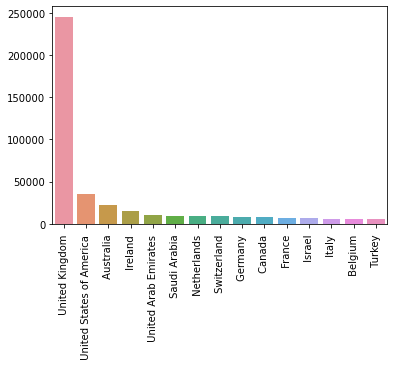

In [6]:
top_15=Review_by_country.head(15)
sns.barplot(top_15.index, top_15.values)
plt.xticks(rotation=90)
plt.show

C:\Users\hsman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

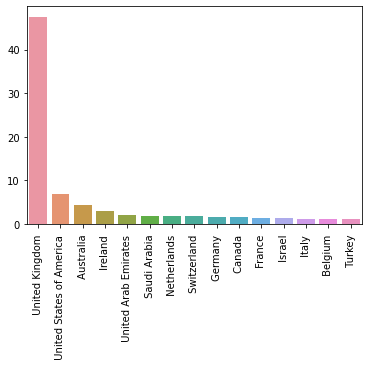

In [7]:
# pct reviews of total
review_pct = (df.Reviewer_Nationality.value_counts()*100/Length).sort_values(ascending=False)

top_15_pct=review_pct.head(15)
sns.barplot(top_15_pct.index, top_15_pct.values)
plt.xticks(rotation=90)
plt.show

In [8]:
#sorting hotels with average score equal or greater than 8.4 according to the number of reviews
df[df.Average_Score >= 8.4][["Hotel_Name", "Average_Score", "Total_Number_of_Reviews"]].drop_duplicates().sort_values(by="Total_Number_of_Reviews", ascending=False)[:20]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
504027,Park Plaza Westminster Bridge London,8.7,12158
311000,Best Western Premier Hotel Couture,8.7,8177
509232,The Student Hotel Amsterdam City,8.7,7656
379680,Golden Tulip Amsterdam West,8.5,7586
236055,DoubleTree by Hilton Hotel London Tower of London,8.7,7491
404728,Glam Milano,8.8,7371
309843,Jaz Amsterdam,8.9,7108
140872,Blakemore Hyde Park,8.5,6596
5257,Park Plaza County Hall London,8.4,6117
183024,St James Court A Taj Hotel London,8.7,5394


In [9]:
#remove stopwords
stop_words = set(stopwords.words('english'))

#combined reviews 
df['combined_reviews'] = df['Positive_Review'] = df['Negative_Review']
df['hotel_review_nationality'] = df['Hotel_Name'] + df['Reviewer_Nationality']
#Remove Stop Words_Indiviually
df['Negative_Review_WO'] = df['Negative_Review'] .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words )]))
df['Positive_Review_WO'] = df['Positive_Review'] .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words )]))

#Remove stop words and noise

df['Clean'] = df['combined_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words )]))
df['Clean'] = df['Clean'].str.lower()
df['Clean'] = df['Clean'].str.replace('\d+', '')


C:\Users\hsman\AppData\Local\Temp/ipykernel_10392/411382670.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean'] = df['Clean'].str.replace('\d+', '')


In [10]:
tokenize=[0] * len(df)


for i in range(0,len(df)):
    tokenize[i] = word_tokenize(str(df['Clean'].iloc[i]))


df['tokenize'] = tokenize


In [12]:
#mapping pos tags
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text):
    text = [word.strip(string.punctuation) for word in text.split()]
    pos_tags = nltk.pos_tag(text)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = " ".join(text)
    return(text)
    
df["Lem_text"]=df['Clean'].apply(clean_text)   
    

In [13]:
#Sentiment Analysis
sid = SIA()

df["Positive"] = [sid.polarity_scores(i)["pos"] for i in df['Lem_text']]
df["Negative"] = [sid.polarity_scores(i)["neg"] for i in df['Lem_text']]
df["Neutral"] = [sid.polarity_scores(i)["neu"] for i in df['Lem_text']]
df["Compound"] = [sid.polarity_scores(i)["compound"] for i in df['Lem_text']]

In [54]:
df["Sentiment"] = np.where(df['Compound'] >= 0.5, 'Pos',
                          np.where(df['Compound'] <= -0.5,'Neg','Neutral'))

df['Sentiment_Code']=np.where(df['Sentiment'] == 'Pos',1,
                             np.where(df['Sentiment'] == 'Neg',-1,0))

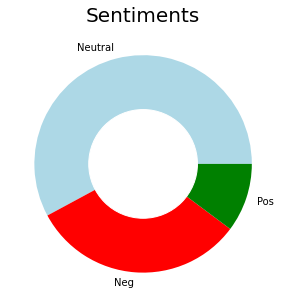

In [15]:
#visualising
sentiments = df["Sentiment"].value_counts()
text = sentiments.index
quantity = sentiments.values

custom_colors = ["lightblue", "red", "Green"]
plt.figure(figsize=(5,5))
plt.pie(quantity, labels=text, colors=custom_colors)
central_circle = plt.Circle((0,0), 0.5, color="white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc("font", size=12)
plt.title("Sentiments", fontsize=20)
plt.show()

In [37]:
#nationality_polarity
reviewer_score = df.groupby(by=["Reviewer_Nationality"])["Positive"].mean().sort_values(ascending=False)[:50].reset_index()
reviewer_score = pd.DataFrame(reviewer_score)
#reviewer_score



Positive                                           1.000000
Reviewer_Nationality_ Aruba                        0.020910
Reviewer_Nationality_ Azerbaijan                  -0.095546
Reviewer_Nationality_ Brunei                      -0.094873
Reviewer_Nationality_ Burundi                      0.039203
Reviewer_Nationality_ Cayman Islands              -0.069344
Reviewer_Nationality_ Central Africa Republic      0.007364
Reviewer_Nationality_ Cook Islands                 0.468595
Reviewer_Nationality_ Cura ao                     -0.085235
Reviewer_Nationality_ Djibouti                     0.187210
Reviewer_Nationality_ Dominica                    -0.081503
Reviewer_Nationality_ El Salvador                 -0.053517
Reviewer_Nationality_ Faroe Islands               -0.040448
Reviewer_Nationality_ Fiji                        -0.100845
Reviewer_Nationality_ Finland                     -0.092979
Reviewer_Nationality_ French Guiana                0.036836
Reviewer_Nationality_ Gambia            

In [18]:
#nationality__hotel_polarity
british_reviews = df[df['Reviewer_Nationality'] == ' United Kingdom '].copy()
british_reviewer_score = british_reviews.groupby(by=["Hotel_Name"])["Positive"].mean().sort_values(ascending=False)[:10].reset_index()
british_reviewer_score = pd.DataFrame(british_reviewer_score)
british_reviewer_score

#nationality__hotel_polarity
#british_reviews = df[df['Reviewer_Nationality'] == ' United Kingdom '].copy()
hotel_reviewer_score = df.groupby(by=["Hotel_Name"])["Positive"].mean().sort_values(ascending=False).reset_index()
hotel_reviewer_score = pd.DataFrame(hotel_reviewer_score)

combo_reviewer_score = df.groupby(by=["Hotel_Name","Reviewer_Nationality"])["Positive"].mean().sort_values(ascending=False).reset_index()
combo_reviewer_score = pd.DataFrame(combo_reviewer_score)
combo_reviewer_score['hotel_review_nationality'] = combo_reviewer_score['Hotel_Name'] + combo_reviewer_score['Reviewer_Nationality']
combo_reviewer_score

,Hotel_Name,Reviewer_Nationality,Positive,hotel_review_nationality
0,Hotel SB Icaria Barcelona,Bangladesh,1.0,Hotel SB Icaria Barcelona Bangladesh
1,Novotel Suites Paris Expo Porte de Versailles,Albania,1.0,Novotel Suites Paris Expo Porte de Versailles ...
2,Mokinba Hotels Baviera,Lebanon,1.0,Mokinba Hotels Baviera Lebanon
3,Brunelleschi Hotel,Bangladesh,1.0,Brunelleschi Hotel Bangladesh
4,Royal Hotel Champs Elys es,Brunei,1.0,Royal Hotel Champs Elys es Brunei
...,...,...,...,...
65107,Hotel Marconi,Montenegro,0.0,Hotel Marconi Montenegro
65108,Hotel Marconi,Namibia,0.0,Hotel Marconi Namibia
65109,Hotel Marconi,Norway,0.0,Hotel Marconi Norway
65110,Hotel Marconi,Oman,0.0,Hotel Marconi Oman


In [19]:
first_column = combo_reviewer_score.pop('hotel_review_nationality')
  
# insert column using insert(position,column_name,
# first_column) function
combo_reviewer_score.insert(0, 'hotel_review_nationality', first_column)

In [30]:
#Tagging
hotelLeisureCounts = df[df['Tags'].str.contains('Leisure')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print("BusinessCounts: ", len(hotelLeisureCounts))
#print(hotelLeisureCounts)

hotelBusinessCounts = df[df['Tags'].str.contains('Business')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print("Leisure Counts: ",len(hotelBusinessCounts))
#print(hotelBusinessCounts)

hotelSoloCounts = df[df['Tags'].str.contains('Solo')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print("Solo Traveller Counts: ",len(hotelSoloCounts))

hotelCoupleCounts = df[df['Tags'].str.contains('Couple')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print("Solo Couple Counts: ",len(hotelCoupleCounts))

hotelGroupCounts = df[df['Tags'].str.contains('Group')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print("Solo Group Counts: ",len(hotelGroupCounts))



BusinessCounts:  1492
Leisure Counts:  1488
Solo Traveller Counts:  1491
Solo Couple Counts:  1492
Solo Group Counts:  1481


In [21]:
# extracting new columne review_text by merging postitive and negative review column
grouped_reviews= df.groupby('Hotel_Name').agg({
                             'Negative_Review': ', '.join,'Positive_Review': ', '.join}).reset_index()
grouped_reviews['review_text'] = grouped_reviews['Positive_Review'].astype(str) +grouped_reviews['Negative_Review'].astype(str)

In [22]:
grouped_reviews

,Hotel_Name,Negative_Review,Positive_Review,review_text
0,11 Cadogan Gardens,Thought the prise of drinks at the bar a litt...,Thought the prise of drinks at the bar a litt...,Thought the prise of drinks at the bar a litt...
1,1K Hotel,Air conditioning in room didn t work and desp...,Air conditioning in room didn t work and desp...,Air conditioning in room didn t work and desp...
2,25hours Hotel beim MuseumsQuartier,Breakfast not included and buffet really expe...,Breakfast not included and buffet really expe...,Breakfast not included and buffet really expe...
3,41,"There wasn t a thing that we didn t like , No...","There wasn t a thing that we didn t like , No...","There wasn t a thing that we didn t like , No..."
4,45 Park Lane Dorchester Collection,More kinds of fruit juice will make the mini ...,More kinds of fruit juice will make the mini ...,More kinds of fruit juice will make the mini ...
...,...,...,...,...
1487,citizenM London Bankside,This was our third stay at this hotel and it ...,This was our third stay at this hotel and it ...,This was our third stay at this hotel and it ...
1488,citizenM London Shoreditch,Lifts need reprogramming exasperating journey...,Lifts need reprogramming exasperating journey...,Lifts need reprogramming exasperating journey...
1489,citizenM Tower of London,"Rooms are small but well designed, breakfast...","Rooms are small but well designed, breakfast...","Rooms are small but well designed, breakfast..."
1490,every hotel Piccadilly,The hotel overall requires an update furnitur...,The hotel overall requires an update furnitur...,The hotel overall requires an update furnitur...


In [23]:
#findout similarity between the reviews of hotel using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
grouped_reviews['review_text'] = grouped_reviews['review_text'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(grouped_reviews['review_text'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(1492, 55344)

In [24]:
#used linear_kernal method for calculating similarity between the hotels.
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [25]:
#Construct a reverse map of indices and hotel names
indices = pd.Series(grouped_reviews.index, index=grouped_reviews['Hotel_Name']).drop_duplicates()

In [26]:
# Function that takes in hotel name as input and outputs most similar hotels
def get_recc(title, cosine_sim=cosine_sim):
    # Get the index of the hotel that matches the hotel_name
    idx = indices[title]
    #print(indices[title])
    #input("")


    # Get the pairwsie similarity scores of all hotels with target
    sim_scores = list(enumerate(cosine_sim[idx]))


    # Sort the hotels 
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar hotels
    sim_scores = sim_scores[1:6]

    hotel_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar hotel
    return grouped_reviews['Hotel_Name'].iloc[hotel_indices]

In [28]:
get_recc(df['Hotel_Name'].iloc[3])

1140                         Park Plaza London Riverbank
495                   Hampshire Hotel Amsterdam American
1145                     Park Plaza Vondelpark Amsterdam
1143                       Park Plaza Victoria Amsterdam
1049    NH Collection Amsterdam Grand Hotel Krasnapolsky
1330                       The Cumberland A Guoman Hotel
292               Doubletree by Hilton London Kensington
1018                  Millennium Gloucester Hotel London
1384                                The Principal London
1419                                           TheWesley
Name: Hotel_Name, dtype: object

In [67]:
names = []
for nbr in range(0,len(df)):
    hotel_name = df['Hotel_Name'].iloc[nbr]
    series=get_recc(hotel_name)
    names.append(series)


In [68]:
df['recc'] = names

In [55]:
df2=df[['Reviewer_Nationality','Average_Score','Total_Number_of_Reviews','Sentiment_Code']]


In [56]:
df_encoded=pd.get_dummies(df2, columns=["Reviewer_Nationality"])


In [57]:
df_encoded.corrwith(df_encoded["Average_Score"]).head(30)

Average_Score                              1.000000
Total_Number_of_Reviews                   -0.179568
Sentiment_Code                            -0.065278
Reviewer_Nationality_                     -0.003922
Reviewer_Nationality_ Abkhazia Georgia    -0.000804
Reviewer_Nationality_ Afghanistan         -0.001240
Reviewer_Nationality_ Albania             -0.002868
Reviewer_Nationality_ Algeria             -0.002045
Reviewer_Nationality_ American Samoa      -0.001249
Reviewer_Nationality_ Andorra              0.001671
Reviewer_Nationality_ Angola              -0.002047
Reviewer_Nationality_ Anguilla             0.000260
Reviewer_Nationality_ Antarctica          -0.000136
Reviewer_Nationality_ Antigua Barbuda     -0.001742
Reviewer_Nationality_ Argentina            0.001096
Reviewer_Nationality_ Armenia              0.000381
Reviewer_Nationality_ Aruba                0.000355
Reviewer_Nationality_ Australia            0.024570
Reviewer_Nationality_ Austria              0.005868
Reviewer_Nat

In [58]:
df_encoded.corrwith(df_encoded["Average_Score"]).tail(30)

Reviewer_Nationality_ Switzerland                              0.016903
Reviewer_Nationality_ Syria                                   -0.002661
Reviewer_Nationality_ Taiwan                                   0.008247
Reviewer_Nationality_ Tajikistan                               0.000597
Reviewer_Nationality_ Tanzania                                -0.000652
Reviewer_Nationality_ Thailand                                -0.002329
Reviewer_Nationality_ Togo                                    -0.001904
Reviewer_Nationality_ Trinidad and Tobago                     -0.002439
Reviewer_Nationality_ Tunisia                                 -0.000702
Reviewer_Nationality_ Turkey                                   0.000051
Reviewer_Nationality_ Turkmenistan                            -0.002713
Reviewer_Nationality_ Turks Caicos Islands                     0.000975
Reviewer_Nationality_ Tuvalu                                  -0.001010
Reviewer_Nationality_ U S Virgin Islands                       0

In [64]:
df_encoded.corrwith(df_encoded['Sentiment_Code'] > .5).head(10)

Average_Score                             -0.011563
Total_Number_of_Reviews                    0.004561
Sentiment_Code                             0.670927
Reviewer_Nationality_                     -0.001286
Reviewer_Nationality_ Abkhazia Georgia    -0.000974
Reviewer_Nationality_ Afghanistan          0.000298
Reviewer_Nationality_ Albania             -0.000598
Reviewer_Nationality_ Algeria             -0.003316
Reviewer_Nationality_ American Samoa      -0.000664
Reviewer_Nationality_ Andorra             -0.000307
dtype: float64

In [60]:
df_encoded.corrwith(df_encoded['Sentiment_Code']).tail(30)

Reviewer_Nationality_ Switzerland                              0.005687
Reviewer_Nationality_ Syria                                    0.000065
Reviewer_Nationality_ Taiwan                                  -0.005673
Reviewer_Nationality_ Tajikistan                               0.000269
Reviewer_Nationality_ Tanzania                                 0.001372
Reviewer_Nationality_ Thailand                                -0.001362
Reviewer_Nationality_ Togo                                     0.001307
Reviewer_Nationality_ Trinidad and Tobago                     -0.001206
Reviewer_Nationality_ Tunisia                                 -0.001959
Reviewer_Nationality_ Turkey                                   0.000737
Reviewer_Nationality_ Turkmenistan                            -0.000931
Reviewer_Nationality_ Turks Caicos Islands                     0.001241
Reviewer_Nationality_ Tuvalu                                   0.000494
Reviewer_Nationality_ U S Virgin Islands                      -0